<a href="https://colab.research.google.com/github/aebongbing/ESAA/blob/main/0401_kaggle_%ED%95%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#데이터 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.5.3
numpy version: 1.25.2
seaborn version: 0.13.1


In [2]:
mall_data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

print('There are {} rows and {} columns in our dataset.'.format(mall_data.shape[0],mall_data.shape[1]))


There are 200 rows and 5 columns in our dataset.


In [3]:
mall_data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
133,134,Female,31,72,71
51,52,Male,33,42,60
73,74,Female,60,50,56
197,198,Male,32,126,74
177,178,Male,27,88,69
112,113,Female,38,64,42
32,33,Male,53,33,4
141,142,Male,32,75,93
49,50,Female,31,40,42
65,66,Male,18,48,59


In [4]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

- 결측치 없음

# 3. Exploratory Data Analysis

## 3.1 Distributions

- 수치 변수를 자세히 조사할 것이다

- 유일한 범주형 변수인 성별을 기준으로 계층화 된

Text(45, 22, 'Mean age: 38.1')

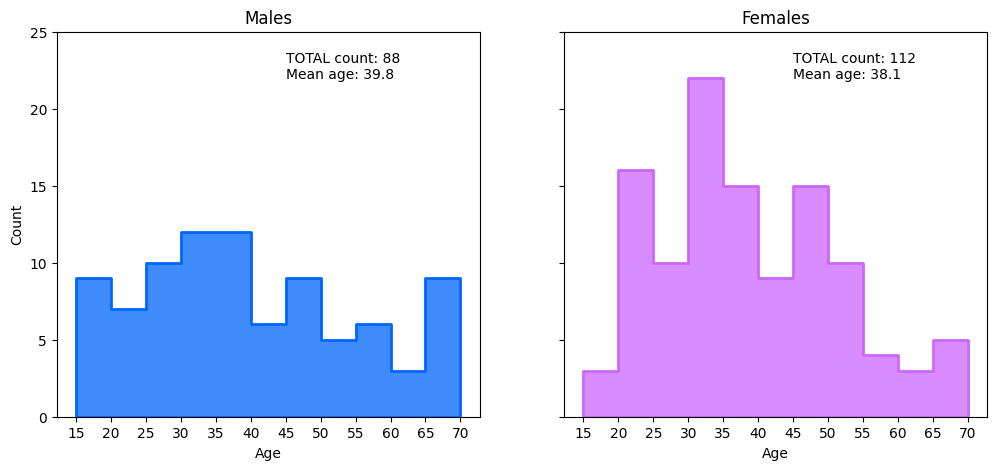

In [6]:
males_age = mall_data[mall_data['Gender'] == 'Male']['Age'] # subset with males age
females_age = mall_data[mall_data['Gender'] == 'Female']['Age'] # subset with females age

age_bins = range(15, 75, 5)

# males histogram
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.histplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=axes[0], element='step', linewidth=2)
axes[0].set(xticks=age_bins, ylim=(0, 25), title='Males', ylabel='Count')
axes[0].text(45, 23, f"TOTAL count: {males_age.count()}")
axes[0].text(45, 22, f"Mean age: {males_age.mean():.1f}")

# females histogram
sns.histplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=axes[1], element='step', linewidth=2)
axes[1].set(xticks=age_bins, title='Females', ylabel='Count')
axes[1].text(45, 23, f"TOTAL count: {females_age.count()}")
axes[1].text(45, 22, f"Mean age: {females_age.mean():.1f}")

In [7]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_age, females_age)[1]))

Kolgomorov-Smirnov test p-value: 0.49


- 남성 고객의 평균 연령은 여성 고객의 평균 연령에 비해 살짝 높다

- 남성 연령 분포는 여성보다 균일하며 가장 큰 연령층은 30~35세이다

- Kolgomorov-Smirnov test는 이 두 그룹 간의 차이가 통계적으로 유의하지 않음을 보여준다.

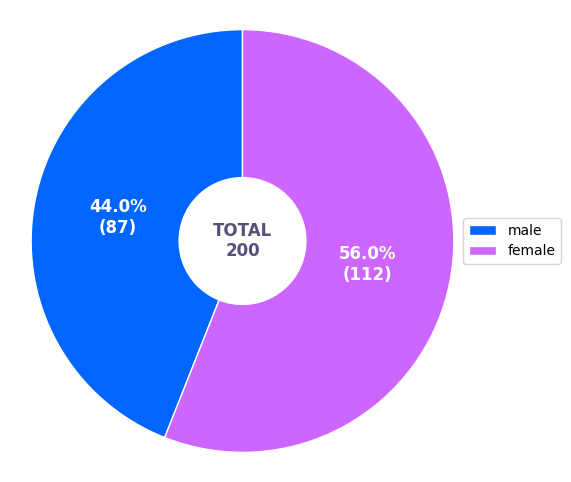

In [8]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(),females_age.count()] # wedge sizes

fig0, ax1 = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax1.pie(sizes,
                                   autopct=lambda pct: labeler(pct, sizes),
                                   radius=1,
                                   colors=['#0066ff','#cc66ff'],
                                   startangle=90,
                                   textprops=dict(color="w"),
                                   wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male','female'],
           loc='center right',
           bbox_to_anchor=(0.7, 0, 0.5, 1))

plt.text(0,0, 'TOTAL\n{}'.format(mall_data['Age'].count()),
         weight='bold', size=12, color='#52527a',
         ha='center', va='center')

plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')  # Equal aspect ratio
plt.show()

- 남성 고객보다 여성 고객이 약간 더 많다

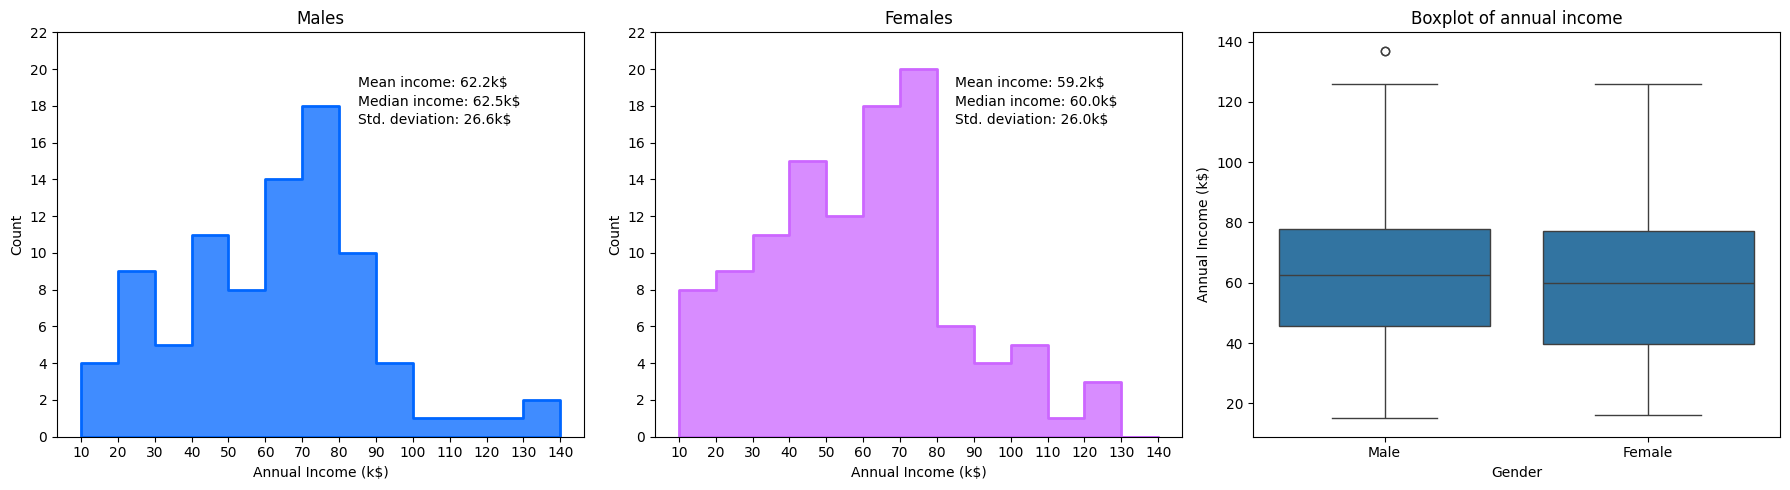

In [9]:
males_income = mall_data[mall_data['Gender'] == 'Male']['Annual Income (k$)'] # subset with males income
females_income = mall_data[mall_data['Gender'] == 'Female']['Annual Income (k$)'] # subset with females income

my_bins = range(10, 150, 10)

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# males histogram
sns.histplot(data=males_income, bins=my_bins, kde=False, color='#0066ff', ax=axes[0], element='step', linewidth=2)
axes[0].set(xticks=my_bins, yticks=range(0, 24, 2), ylim=(0, 22), title='Males', ylabel='Count')
axes[0].text(85, 19, f"Mean income: {males_income.mean():.1f}k$")
axes[0].text(85, 18, f"Median income: {males_income.median():.1f}k$")
axes[0].text(85, 17, f"Std. deviation: {males_income.std():.1f}k$")

# females histogram
sns.histplot(data=females_income, bins=my_bins, kde=False, color='#cc66ff', ax=axes[1], element='step', linewidth=2)
axes[1].set(xticks=my_bins, yticks=range(0, 24, 2), ylim=(0, 22), title='Females', ylabel='Count')
axes[1].text(85, 19, f"Mean income: {females_income.mean():.1f}k$")
axes[1].text(85, 18, f"Median income: {females_income.median():.1f}k$")
axes[1].text(85, 17, f"Std. deviation: {females_income.std():.1f}k$")

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall_data, ax=axes[2])
axes[2].set_title('Boxplot of annual income')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [10]:

print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_income, females_income)[1]))

Kolgomorov-Smirnov test p-value: 0.78


- 남성의 평균 소득은 여성보다 높다, 표준편차는 두 그룹 모두 유사하다

- 남성 그룹은 특이치가 하나 있다

-K-S 테스트에서는 두 그룹이 통계적으로 다르지 않은 것으로 나타났다

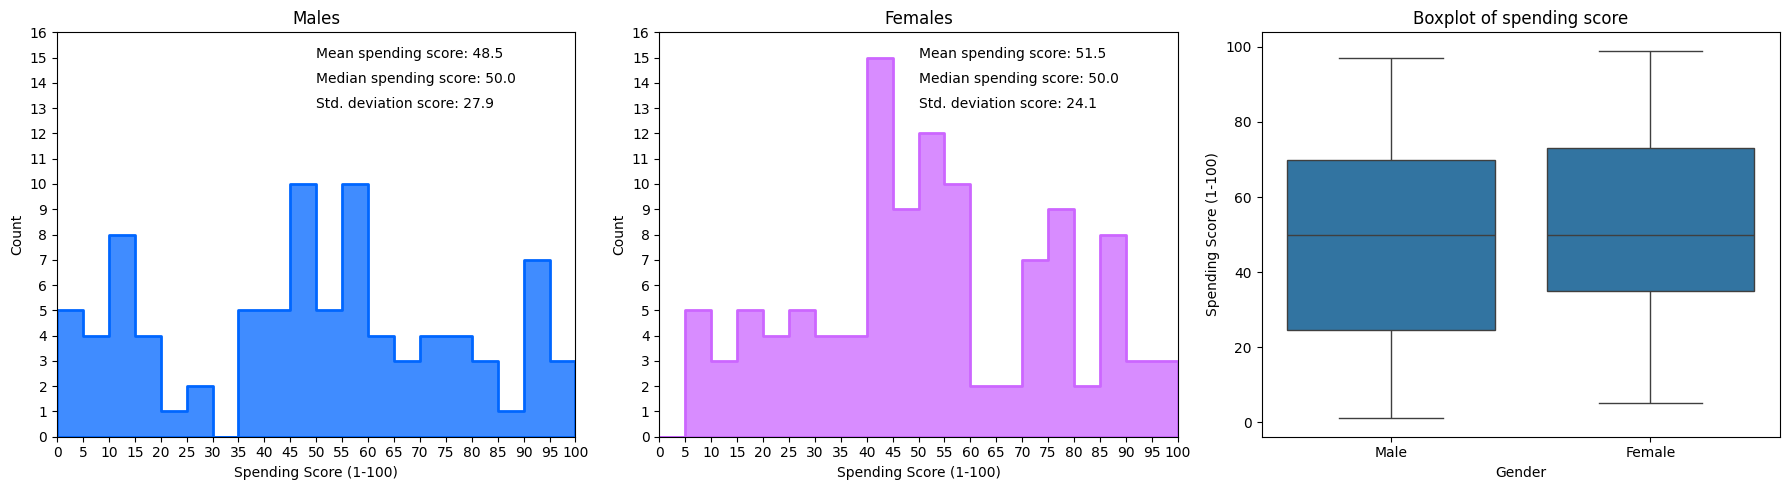

In [11]:

males_spending = mall_data[mall_data['Gender'] == 'Male']['Spending Score (1-100)'] # subset with males age
females_spending = mall_data[mall_data['Gender'] == 'Female']['Spending Score (1-100)'] # subset with females age

spending_bins = range(0, 105, 5)

# create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# males histogram
sns.histplot(data=males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=axes[0], element='step', linewidth=2)
axes[0].set(xticks=spending_bins, xlim=(0, 100), yticks=range(0, 17, 1), ylim=(0, 16), title='Males', ylabel='Count')
axes[0].text(50, 15, f"Mean spending score: {males_spending.mean():.1f}")
axes[0].text(50, 14, f"Median spending score: {males_spending.median():.1f}")
axes[0].text(50, 13, f"Std. deviation score: {males_spending.std():.1f}")

# females histogram
sns.histplot(data=females_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=axes[1], element='step', linewidth=2)
axes[1].set(xticks=spending_bins, xlim=(0, 100), yticks=range(0, 17, 1), ylim=(0, 16), title='Females', ylabel='Count')
axes[1].text(50, 15, f"Mean spending score: {females_spending.mean():.1f}")
axes[1].text(50, 14, f"Median spending score: {females_spending.median():.1f}")
axes[1].text(50, 13, f"Std. deviation score: {females_spending.std():.1f}")

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall_data, ax=axes[2])
axes[2].set_title('Boxplot of spending score')

# adjust spacing between subplots
plt.tight_layout()
plt.show()

In [12]:
print('Kolgomorov-Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(males_spending, females_spending)[1]))

Kolgomorov-Smirnov test p-value: 0.29


- 여성의 평균 지출 점수가 남성보다 높다
- K-S검정 P값은 귀무가설을 기각할 증거가 없음을 나타낸다
- 그러나 증거는 이전 비교만큼 강력하지 않다

In [13]:
medians_by_age_group = mall_data.groupby(["Gender",pd.cut(mall_data['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

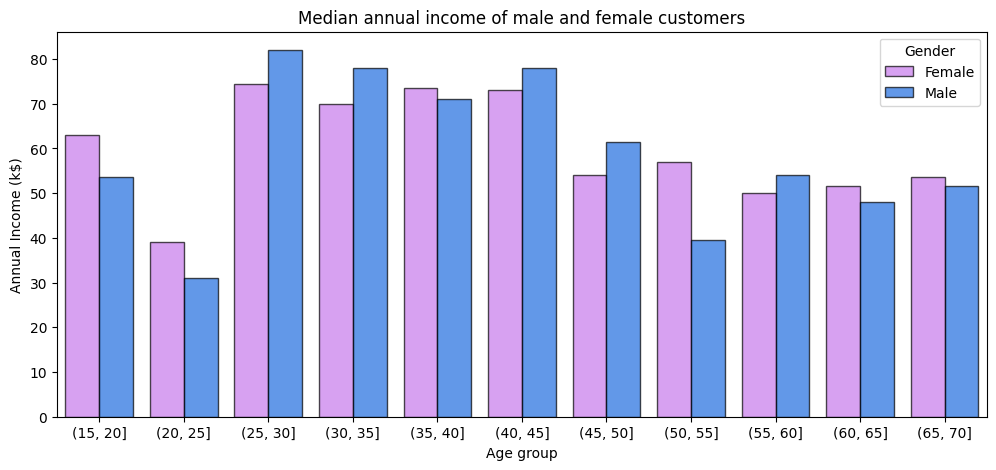

In [14]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group,
            palette=['#cc66ff','#0066ff'],
            alpha=0.7,edgecolor='k',
            ax=ax)
ax.set_title('Median annual income of male and female customers')
ax.set_xlabel('Age group')
plt.show()

- 가장 부유한 고객이 25~45세임을 보여준다
- 여성과 남성의 가장 큰 차이는 25~30세와 50~55세 연령대에서 나타난다

# Correlation

- 수치 변수 간의 상관관계 조사

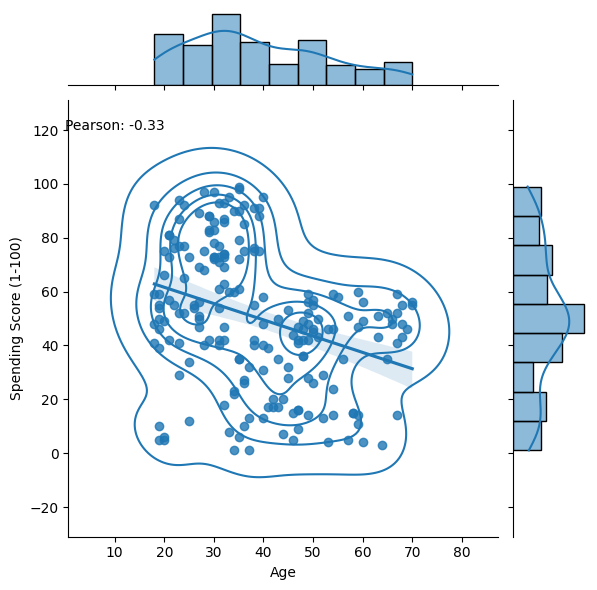

In [15]:
from scipy.stats import pearsonr

# calculating Pearson's correlation
corr, _ = pearsonr(mall_data['Age'], mall_data['Spending Score (1-100)'])

jp = (sns.jointplot(x='Age', y='Spending Score (1-100)', data=mall_data,
                    kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(0,120, 'Pearson: {:.2f}'.format(corr))
plt.show()

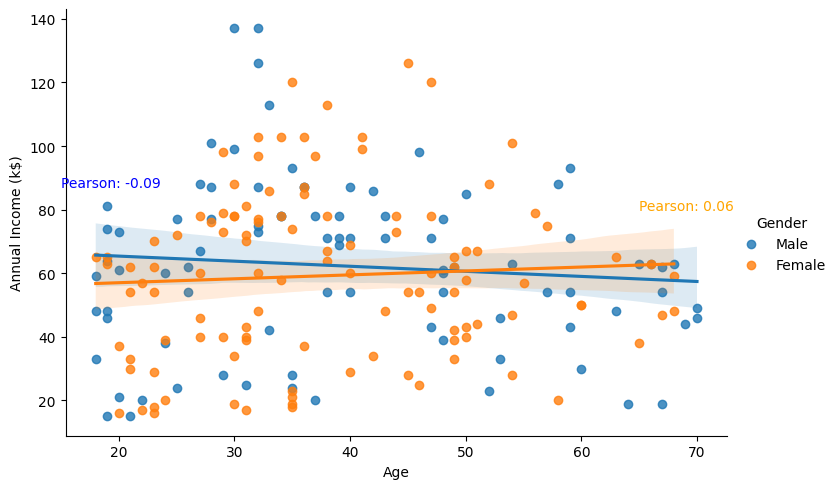

In [16]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot(x='Age', y='Annual Income (k$)', data=mall_data, hue='Gender',
          aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

- 성별에 관계없이 고객의 연령과 연간 소득 사이에는 무시할 만한 상관관계가 있

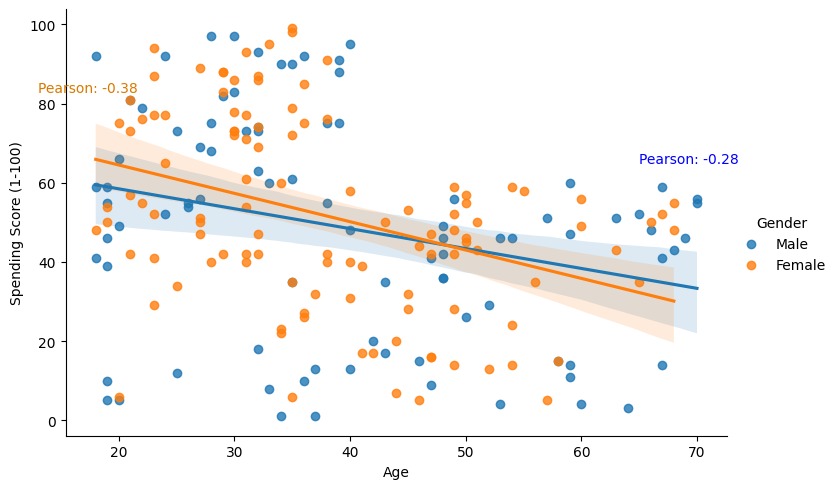

In [17]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot(x='Age', y='Spending Score (1-100)', data=mall_data, hue='Gender',
          aspect=1.5)

plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

- 두 성별 모두 연령과 지출 점수 사이에는 주간 음의 상관관계가 있다

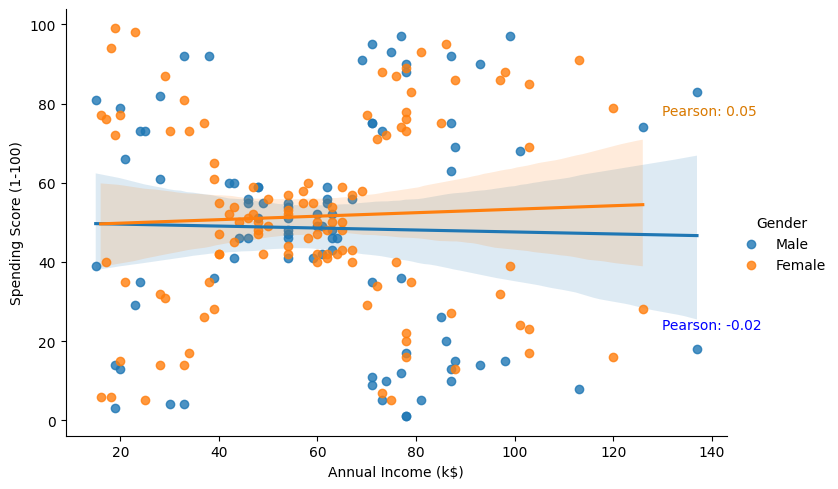

In [18]:
# calculating Pearson's correlations
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)


sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_data, hue='Gender',
           aspect=1.5)


plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

4. Clustering
K-Means, DBSCAN, Affinity Propagation
여기서는 표준화하지 않겠다.

4.1 K-Means
- 이 장에서는 대부분의 기계 학습 과정에서 가르치는 매우 인기 있는 K-Means 알고리즘에 중점을 둔다.
4.1.1 Description
3가지 주요 단계

- 시드 포인트를 사용하여 샘플을 초기 그룹으로 분할 -> 이러한 시드 포인트에 가장 가까운 샘플은 초기 클러스터를 생성

- 그룹의 중심점(중심)까지의 샘플 거리를 계산, 가장 가까운 샘플을 클러스터에 할당

- 새로 생성된(업데이트된) 클러스터 중심을 계산

알고리즘이 수렴할 때까지 2단계와 3단계를 반복

K-Means의 목표: 모든 클러스터에 걸쳐 목적 함수(아래 사진)를 최소화하는 것

In [19]:
from sklearn.cluster import KMeans
#숫자 열만 사용->성별x

In [20]:
X_numerics = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] # subset with numeric variables only

클러스터 개수를 찾기 위해 엘보 방법 사용

- 그래프에서 꼬임 또는 팔꿈치가 보이는 클러스터 수 선택

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

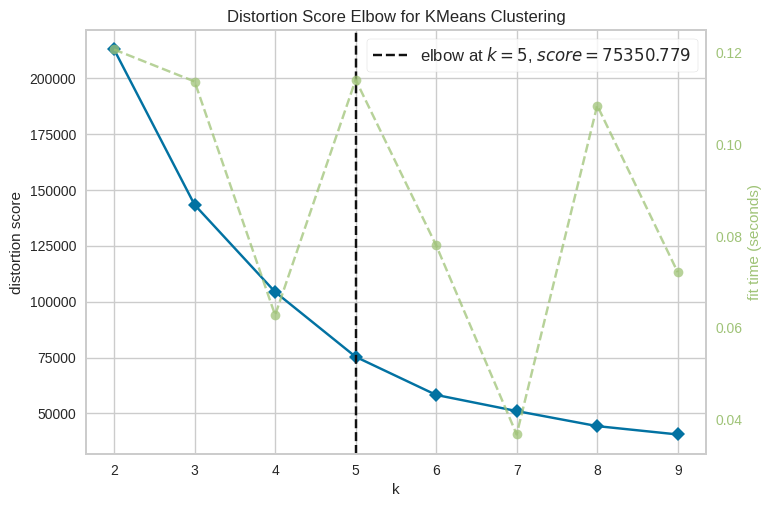

In [21]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()


- 그래프는 클러스터 수가 증가함에 따라 왜곡 점수가 감소함.
- 그러나 명확한 엘보는 보이지 않는다.
- 기본 알고리즘은 5개 클러스터 제안 -> 5개 또는 6개를 선택하는 것이 좋아 보인다.


실루엣 점수 확인

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

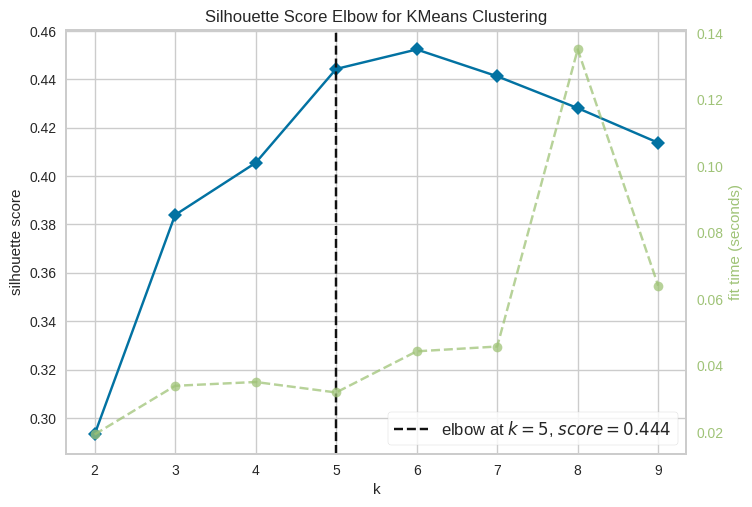

In [22]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [23]:
# 5개
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


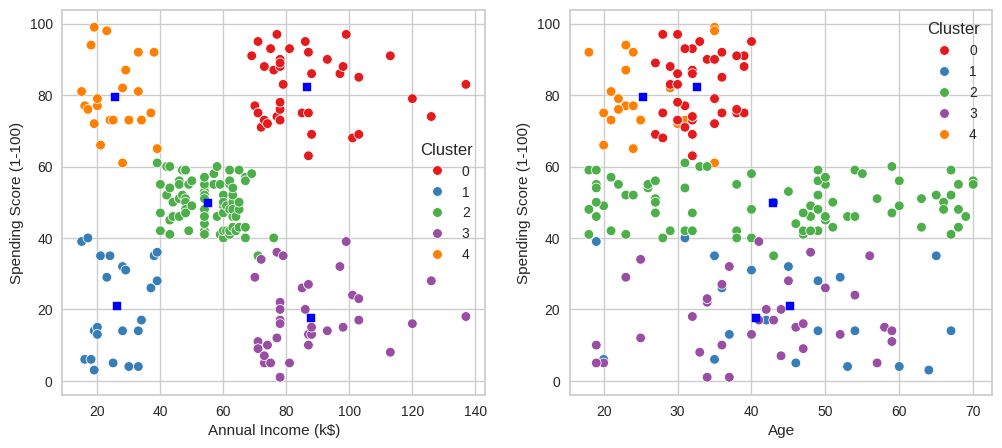

In [24]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

5개의 클러스터를 생성

-연소득이 낮고 지출 점수가 높은 고객
-중간 연소득과 중간 지출 점수를 가진 고객
-연소득은 높고 지출 점수는 낮은 고객
-연소득이 높고 지출 점수가 높은 고객
-연소득이 낮고 지출 점수가 낮은 고객

고객 연령에 따라 별도의 그룹이 없다.

군집별 크기

In [25]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,39
1,23
2,80
3,36
4,22


- 가장 큰 클러스터: 1번

3D 시각화

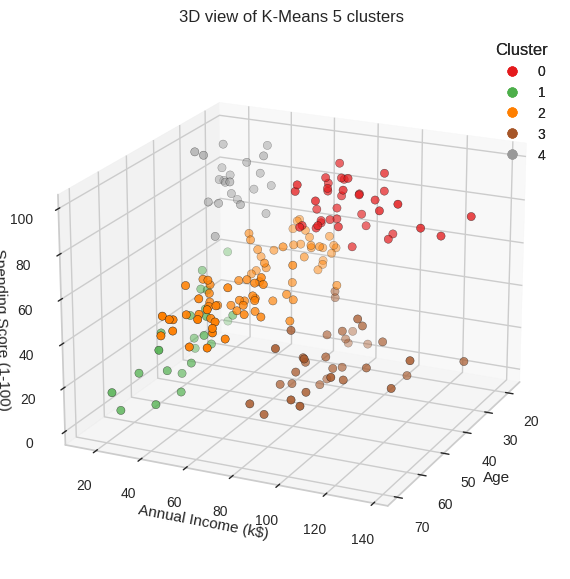

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d', elev=20, azim=210)
scatter = ax.scatter(KM5_clustered['Age'],
                     KM5_clustered['Annual Income (k$)'],
                     KM5_clustered['Spending Score (1-100)'],
                     c=KM5_clustered['Cluster'],
                     s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D view of K-Means 5 clusters')
ax.azim = 25

# Create a legend with the unique colors from the scatter
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Cluster")
ax.add_artist(legend)

plt.show()

In [27]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['Cluster']==n]['Age'],
        y = db[db['Cluster']==n]['Spending Score (1-100)'],
        z = db[db['Cluster']==n]['Annual Income (k$)'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 5
        )
     )

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



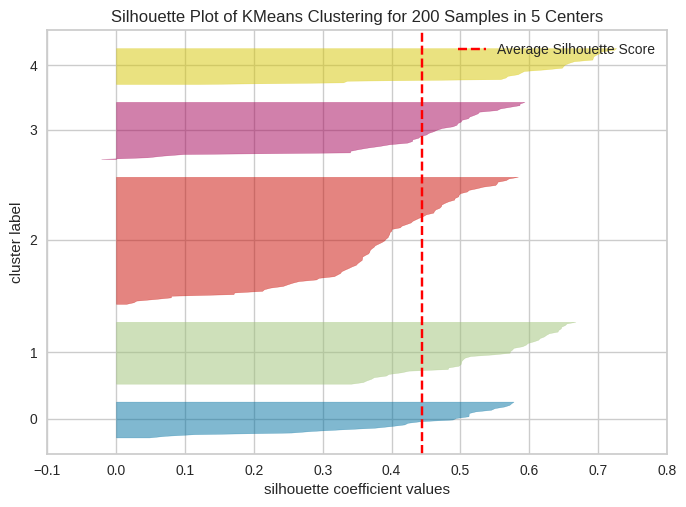

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [29]:
#6개
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_ # append labels to points

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



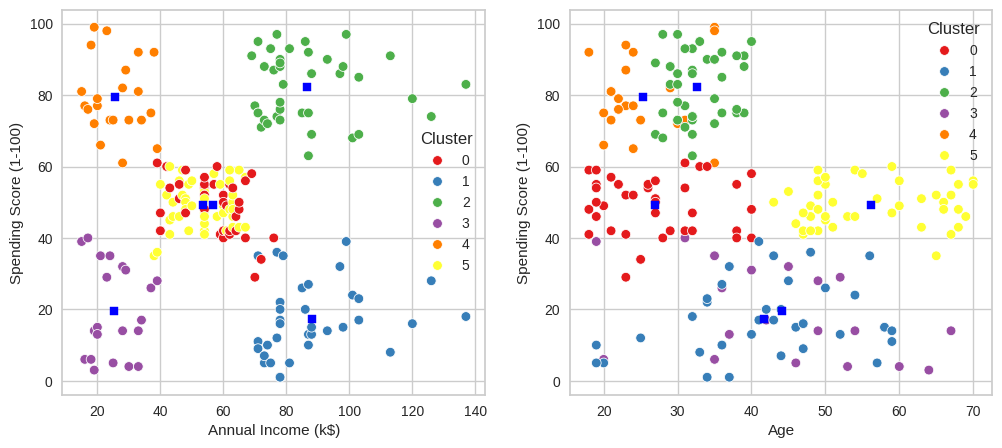

In [30]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

- 연간 중간 및 중간 지출 점수를 보유한 젊은 고객
- 연간 소득이 높고 지출 점수가 낮음인 고객
- 연간 중간 및 중간 지출 점수를 보유한 젊은 고객
- 높은 연간 소득과 높은 지출 점수를 가진 고객
- 연간 소득이 낮고 지출 점수가 낮은 고객
- 연간 소득이 낮고 지출 점수가 높은 고객

고객 연령에 따른 별도의 그룹 x

In [31]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,38
1,35
2,39
3,21
4,22
5,45


In [32]:
# Plotly interactive 3D plot

trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Age'),
            yaxis = dict(title = 'Spending Score'),
            zaxis = dict(title = 'Annual Income')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



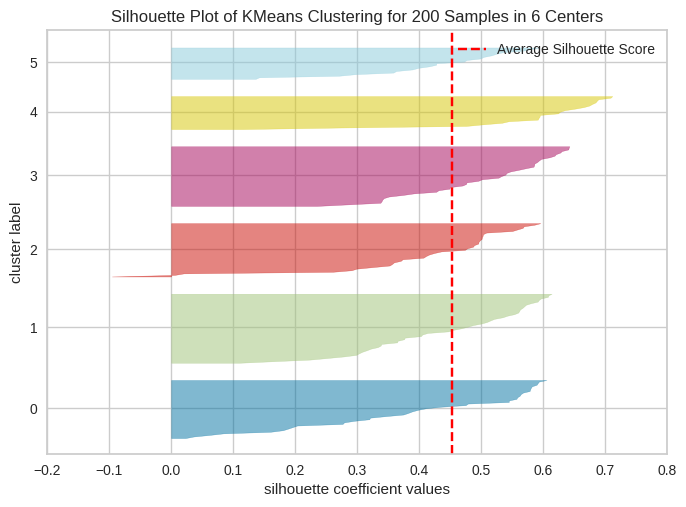

In [33]:
model = KMeans(n_clusters=6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

4.2 DBSCAN

4.2.1 Description

Density-Based Spatial Clustering of Application with Noise의 약자

- 핵심 아이디어 : 밀집 지역 개념에 관한 것
- 자연 클러스터는 밀집된 지점으로 구성되어 있다고 가정
- "밀집 지역"의 정의가 필요 -> 두 매개변수가 필요
- Eps, ε - 거리
- MinPts – 거리 Eps 내의 최소 포인트 수
- 거리 측정법은 사용자가 지정할 수 있지만 일반적으로 유클리드 거리가 구현된다.

- "밀집 영역"은 모든 지점 사이의 거리 Eps 내에 있는 최소 개수의 지점으로 생성
- 이 거리 내에 있지만 다른 지점의 최소 수에 가깝지 않은 지점은 "경계 지점"
- 나머지는 노이즈 또는 이상치

장점

- Eps 와 MinPts 매개변수를 기반으로 클러스터 자체의 수를 찾는다.
- 길쭉한 클러스터 또는 다른 클러스터로 둘러싸인 클러스터를 구별할 수 있다.
- K-Means는 항상 볼록하다.
- 어떤 클러스터에도 맞지 않는 점을 찾을 수 있고, 이상값을 감지할 수 있다.

단점

- 각 지점에 대해 이웃 쿼리를 실행해야 하기 때문에 평균 O(n log(n))의 높은 계산 비용이 발생
- 다양한 밀도의 클러스터를 제대로 식별하지 못함

4.2.2 Use case - customers segmentation

In [34]:
from sklearn.cluster import DBSCAN

- 두 가지 하이퍼파라미터가 있다


In [35]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

생성된 클러스터 수를 확인

In [36]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

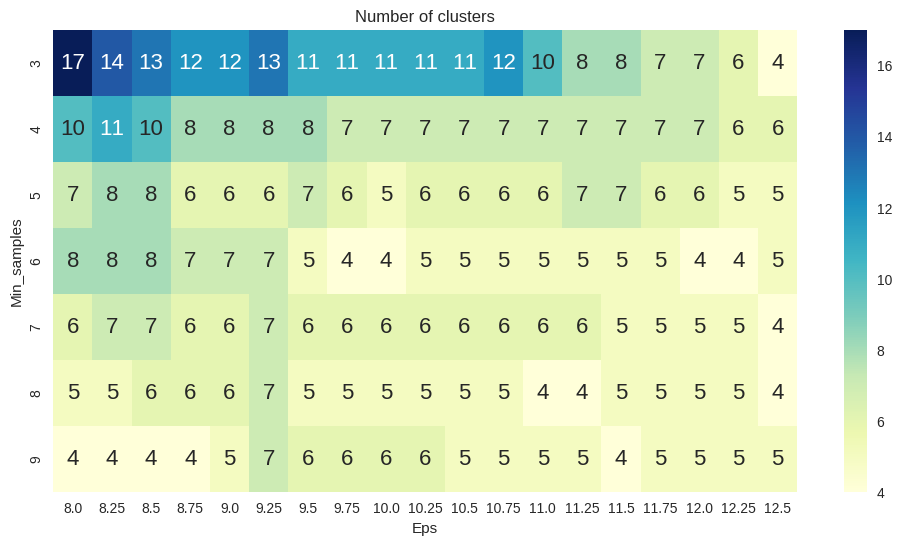

In [37]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

- 히트맵에서는 클러스터 수가 4~17까지 다양하다는 것을 보여준다. 그러나 대부분은 4~7개이다.

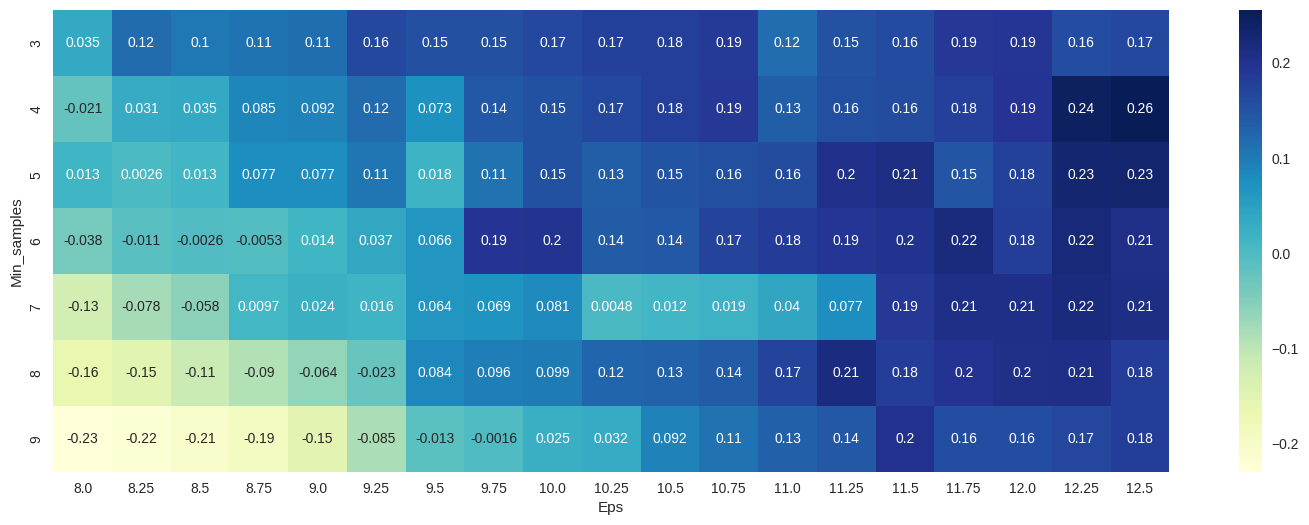

In [38]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [39]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [40]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


- 5개의 클러스터와 이상값 클러스터(-1)를 생성
- 일부 클러스터에는 관측치가 4개만 있다. 18개의 이상값도 있다.

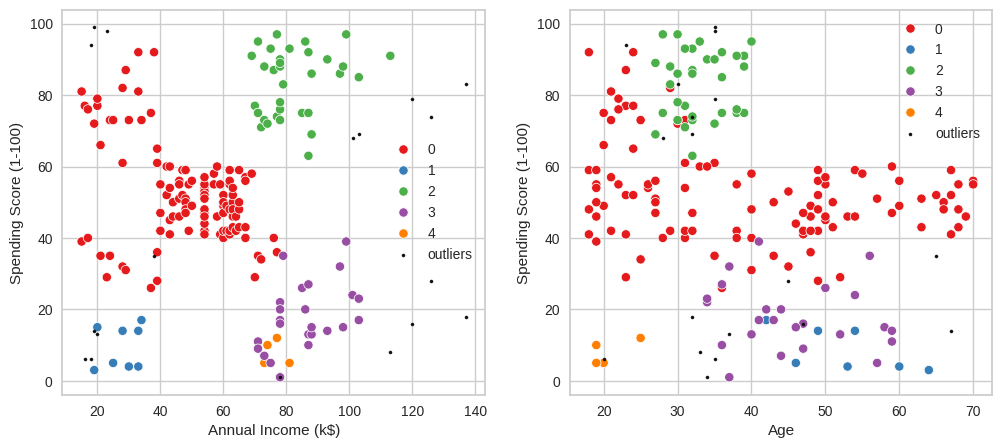

In [41]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

- 몇 가지 이상값이 있음을 보여준다.

# 4.3 Affinity Propagation

4.3.1 Description

- 수렴될 때까지 한 쌍의 지점 간에 메시지를 보내는 개념을 기반으로 구축

- 최적의 클러스터 수를 자체적으로 찾는다.

- 가장 큰 장점 : 초기화 기준에 대한 민감도가 부족하다는 것

- 두 가지 매개변수 지정

  - 음수이며 사용되는 예시 수를 제어하는 기본 설정
  - 메시지 업데이트 시 수치 진동을 방지하는 감쇠 계수
4.3.2 Use case - customers segmentation

In [42]:
from sklearn.cluster import AffinityPropagation

In [43]:
no_of_clusters = []
preferences = range(-20000,-5000,100) # arbitraty chosen range
af_sil_score = [] # silouette scores

for p in preferences:
    AF = AffinityPropagation(preference=p, max_iter=200).fit(X_numerics)
    no_of_clusters.append((len(np.unique(AF.labels_))))
    af_sil_score.append(silhouette_score(X_numerics, AF.labels_))

af_results = pd.DataFrame([preferences, no_of_clusters, af_sil_score], index=['preference','clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning:

Affinity propagation did not converge, this model may return degenerate cluster centers and labels.



,preference,clusters,sil_score
82,-11800.0,6.0,0.451649
27,-17300.0,6.0,0.451491
51,-14900.0,6.0,0.451491
52,-14800.0,6.0,0.451440
28,-17200.0,6.0,0.451440


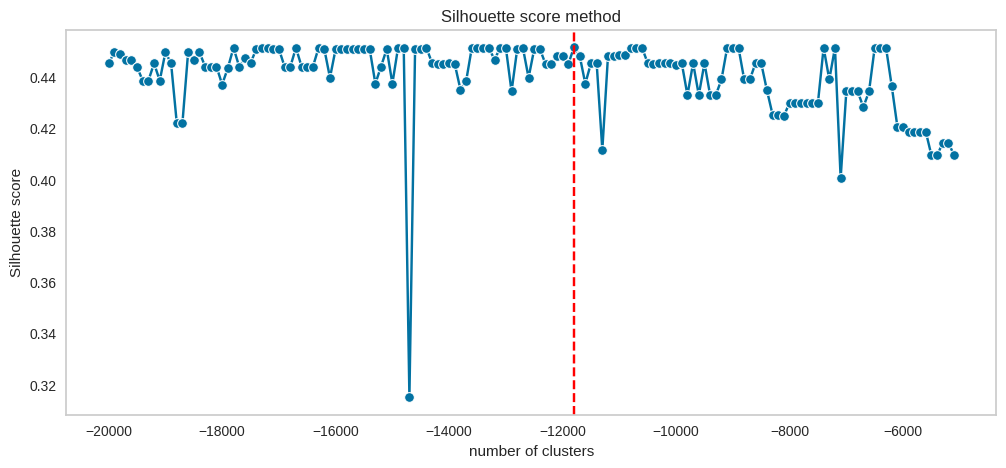

In [44]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=preferences, y=af_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(-11800, ls="--", c="red")
plt.grid()
plt.show()

In [45]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)

In [46]:
AF_clustered = X_numerics.copy()
AF_clustered.loc[:,'Cluster'] = AF.labels_ # append labels to points

In [47]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ["AF_size"]
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


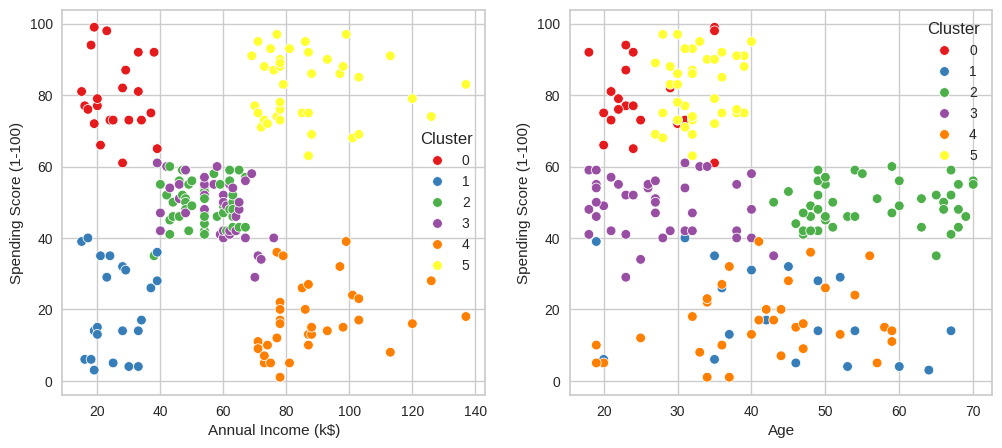

In [48]:
fig3, (ax_af) = plt.subplots(1,2,figsize=(12,5))

scat_1 = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', ax=ax_af[0], palette='Set1', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=AF_clustered,
                hue='Cluster', palette='Set1', ax=ax_af[1], legend='full')

plt.setp(ax_af[0].get_legend().get_texts(), fontsize='10')
plt.setp(ax_af[1].get_legend().get_texts(), fontsize='10')
plt.show()

- K-Means의 결과와 비슷하게 나왔다.
# 5. Comparison and discussion

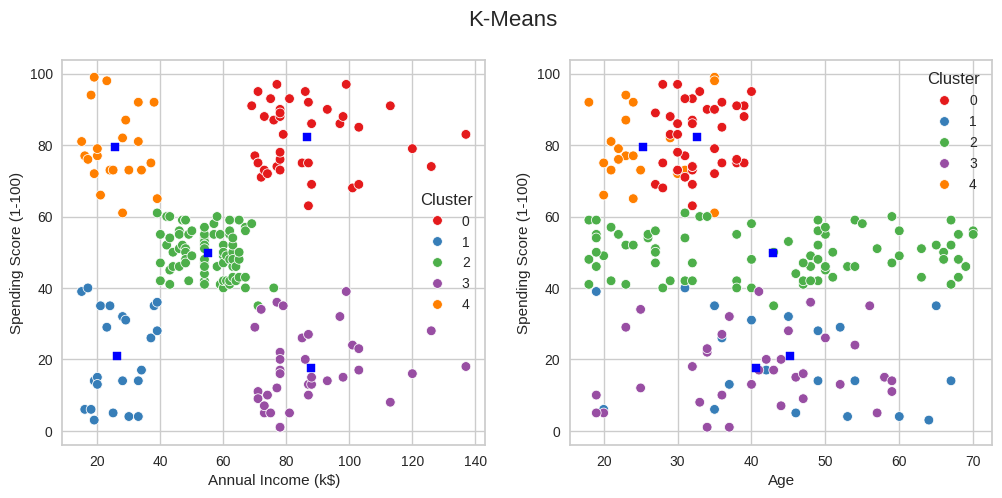

In [49]:
fig1.suptitle('K-Means', fontsize=16)
fig1

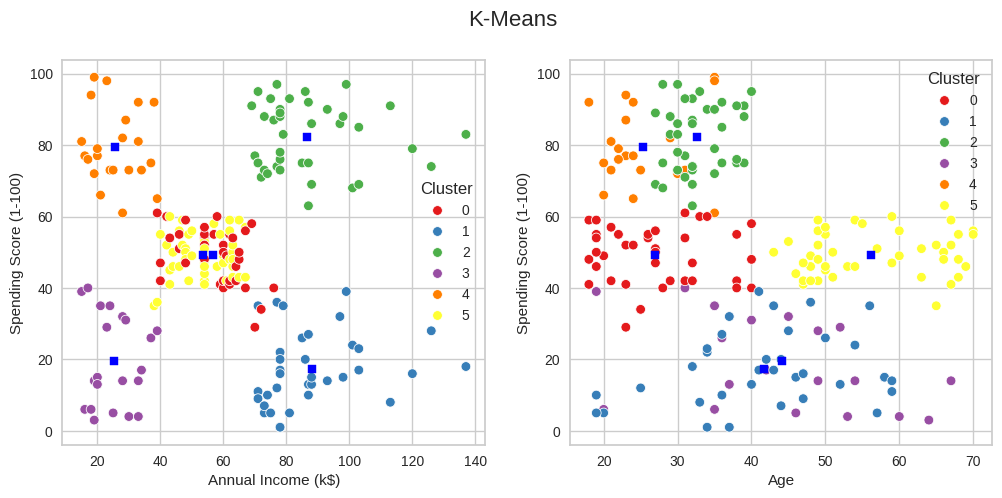

In [50]:
fig11.suptitle('K-Means', fontsize=16)
fig11

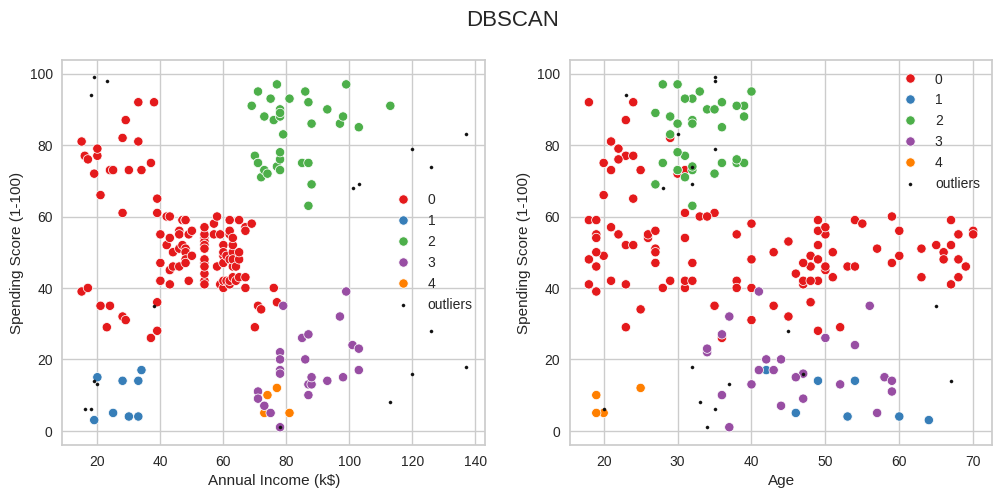

In [51]:
fig2.suptitle('DBSCAN', fontsize=16)
fig2

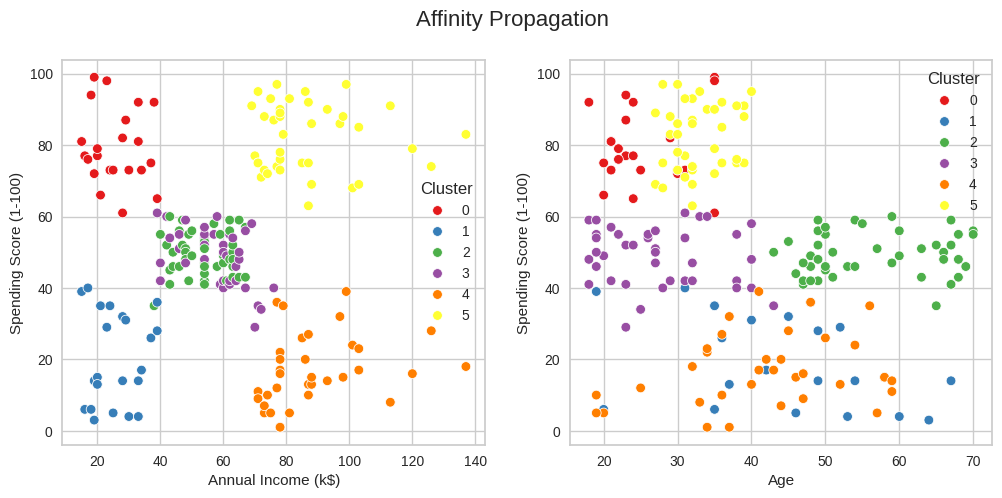

In [52]:
fig3.suptitle('Affinity Propagation', fontsize=16)
fig3

In [53]:
clusters = pd.concat([KM6_clust_sizes, DBSCAN_clust_sizes, AF_clust_sizes],axis=1, sort=False)
clusters

,KM_size,DBSCAN_size,AF_size
Cluster,,,
0,38.0,112.0,22.0
1,35.0,8.0,22.0
2,39.0,34.0,44.0
3,21.0,24.0,39.0
4,22.0,4.0,34.0
5,45.0,NaN,39.0
-1,NaN,18.0,NaN
